In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
database_cleaned = pd.read_csv("database_cleaned.csv")

# Display the first few rows of the dataset
database_cleaned.head()

,Unnamed: 0,driver_tag,time_tag,dist_ahead,time_of_impact,num_of_det_vehicles,veh_flag,gps_speed,overspeeding,min_age,...,chosen,inv_cdf_nor,inv_cdf_acc,inv_cdf_brk,density_nor,density_acc,density_brk,selection_correction_nor,selection_correction_acc,selection_correction_brk
0,1,11,0,-1.0,-1.0,0,0,65.033333,0,40,...,0.175422,0.253168,-0.932953,-0.756593,0.386360,0.258170,0.299646,0.644008,1.471704,1.333851
1,2,11,1,-1.0,-1.0,0,0,68.633333,0,40,...,0.474564,-0.063802,-0.391447,-0.924155,0.398131,0.369519,0.260287,0.838941,1.062650,1.464733
2,3,11,2,-1.0,-1.0,0,0,71.222222,0,40,...,0.611034,0.282014,-0.993794,-0.742789,0.383389,0.243472,0.302763,0.627444,1.520167,1.323236
3,4,11,3,-1.0,-1.0,0,0,74.344444,0,40,...,0.218625,0.211747,-0.850485,-0.776847,0.390098,0.277870,0.295028,0.668151,1.406741,1.349474
4,5,11,4,-1.0,-1.0,0,0,77.111111,0,40,...,0.443577,-0.141907,-1.079466,-0.211540,0.394946,0.222782,0.390115,0.890366,1.589142,0.937252


In [2]:
# Define the predictors and response variable
X = database_cleaned[['target_lag1', 'target_lag_diff2', 'target_lag_diff3', 'target_lag_diff4', 
                      'num_of_det_vehicles_diff1', 'num_of_det_vehicles_diff2', 'num_of_det_vehicles_diff3', 
                      'num_of_det_vehicles_diff4', 'is_drowsy', 'is_aggressive', 'num_of_det_vehicles', 
                      'selection_correction_acc', 'selection_correction_nor', 'selection_correction_brk']]
X = sm.add_constant(X)  # Adding a constant for the intercept
y = database_cleaned['gps_speed']


In [3]:
# Check for missing values excluding the 'const' column
missing_values_excluding_const = database_cleaned[X.columns[1:].tolist() + ['gps_speed']].isnull().sum()

missing_values_excluding_const

target_lag1                  0
target_lag_diff2             0
target_lag_diff3             0
target_lag_diff4             0
num_of_det_vehicles_diff1    0
num_of_det_vehicles_diff2    0
num_of_det_vehicles_diff3    0
num_of_det_vehicles_diff4    0
is_drowsy                    0
is_aggressive                0
num_of_det_vehicles          0
selection_correction_acc     1
selection_correction_nor     0
selection_correction_brk     0
gps_speed                    0
dtype: int64

In [4]:
# Drop rows with NaN values
database_cleaned = database_cleaned.dropna(subset=X.columns[1:].tolist() + ['gps_speed'])

# Refit the linear regression model
X_cleaned = database_cleaned[X.columns[1:].tolist()]
X_cleaned = sm.add_constant(X_cleaned)
y_cleaned = database_cleaned['gps_speed']

LagModel8_1lm_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

# Display the model summary
LagModel8_1lm_cleaned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gps_speed   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     142.3
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:48:52   Log-Likelihood:                -25270.
No. Observations:                6678   AIC:                         5.057e+04
Df Residuals:                    6663   BIC:                         5.067e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       131.4687      5.560     23.645      0.000     120.569     142.368
target_lag1                  -0.0012      0.000     -4.671      0.000      -0.002      -0.001
target_lag_diff2              0.1714      0.160      1.068      0.285      -0.143       0.486
target_lag_diff3             -0.0639      0.165     -0.386      0.699      -0.388       0.260
target_lag_diff4             -0.0198      0.161     -0.123      0.902      -0.335       0.295
num_of_det_vehicles_diff1    -2.4594      0.934     -2.634      0.008      -4.290      -0.629
num_of_det_vehicles_diff2     0.5783      0.918      0.630      0.529      -1.221       2.377
num_of_det_vehicles_diff3    -0.2267      0.922     -0.246      0.806      -2.034       1.581
num_of_det_vehicles_diff4    -1.6206      0.718     -2.258      0.024      -3.028      -0.214
is_drowsy                     2.6463      0.306      8.661      0.000       2.047       3.245
is_aggressive                12.5120      0.440     28.407      0.000      11.649      13.375
num_of_det_vehicles          -1.0041      0.737     -1.362      0.173      -2.449       0.441
selection_correction_acc     -9.5570      1.581     -6.046      0.000     -12.656      -6.458
selection_correction_nor    -11.0098      2.009     -5.479      0.000     -14.949      -7.071
selection_correction_brk    -18.4732      1.650    -11.197      0.000     -21.707     -15.239
==============================================================================
Omnibus:                      152.507   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.517
Skew:                          -0.310   Prob(JB):                     8.57e-41
Kurtosis:                       3.529   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# Posterior Predictive Check: Observed vs Predicted values
predicted_values = LagModel8_1lm_cleaned.predict(X_cleaned)
residuals = y_cleaned - predicted_values

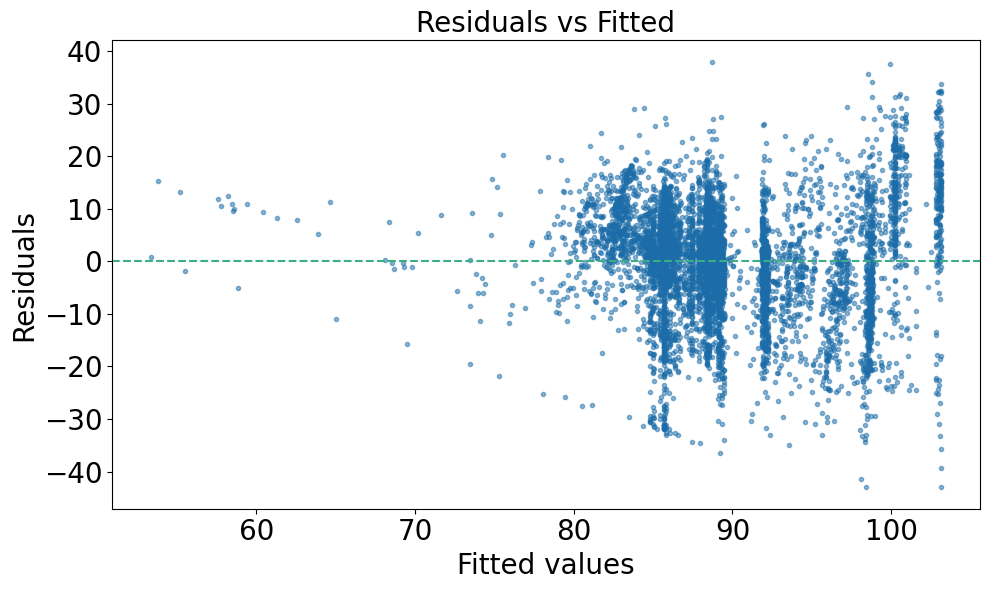

In [6]:
# 1. Residuals vs Fitted
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, color='#1B6CA8', alpha=0.5, marker='.')
plt.axhline(y=0, color='#3AAF85', linestyle='--')
plt.xlabel("Fitted values", fontsize=20)
plt.ylabel("Residuals", fontsize=20)
plt.title("Residuals vs Fitted", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1000x600 with 0 Axes>

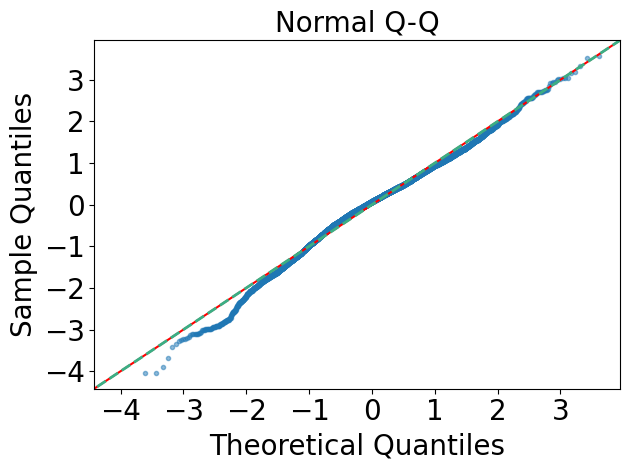

In [7]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, fit=True, line='45', color='#1B6CA8', marker='.', alpha=0.5)
plt.title("Normal Q-Q", fontsize=20)
plt.xlabel("Theoretical Quantiles", fontsize=20)
plt.ylabel("Sample Quantiles", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Manually adding the 45-degree line with specified color
plt.plot([min(residuals), max(residuals)], [min(residuals), max(residuals)], color='#3AAF85', linestyle='--', lw=2)

plt.tight_layout()
plt.show()

In [8]:
standardized_residuals = residuals / residuals.std()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


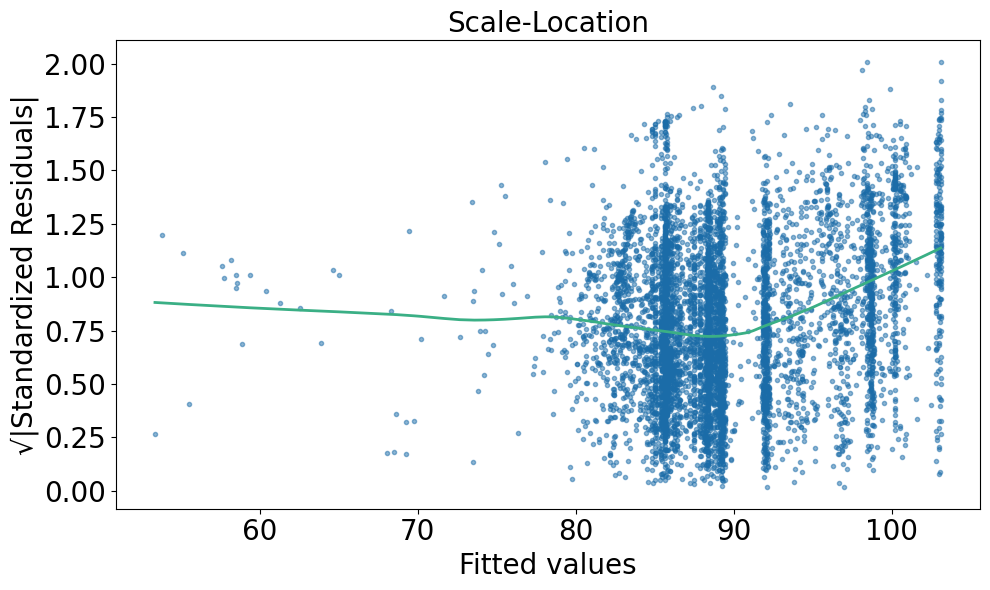

In [9]:
# 3. Scale-Location (Spread-Location) plot with smoothed line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(predicted_values, np.sqrt(np.abs(standardized_residuals)), color='#1B6CA8', alpha=0.5, marker='.')

# Adding a smoothed line
sns.regplot(predicted_values, np.sqrt(np.abs(standardized_residuals)), scatter=False, lowess=True, color='#3AAF85', line_kws={'linewidth': 2})

plt.xlabel("Fitted values", fontsize=20)
plt.ylabel("√|Standardized Residuals|", fontsize=20)
plt.title("Scale-Location", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [10]:
# Getting influence and leverage values
influence = LagModel8_1lm_cleaned.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

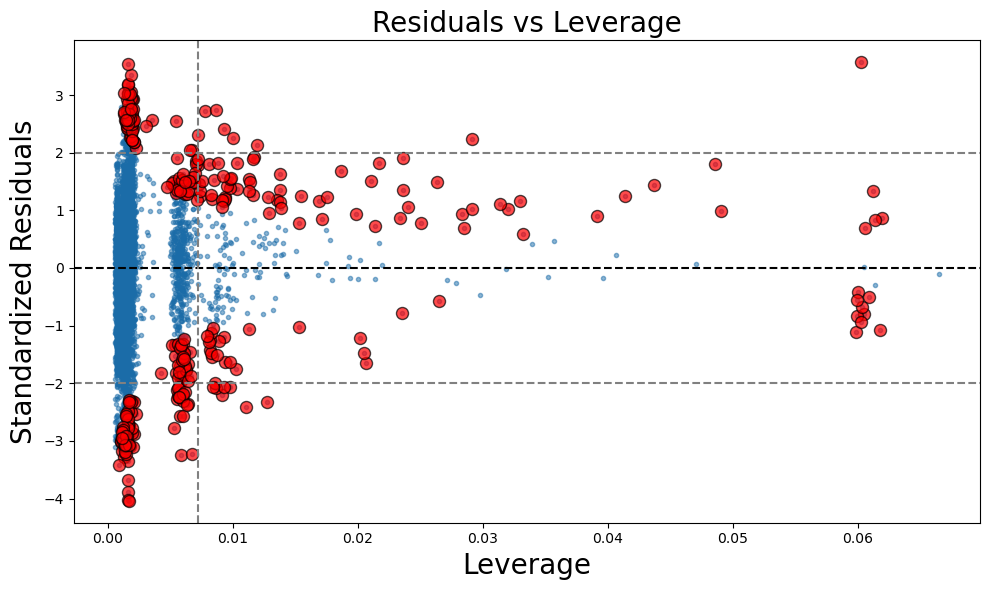

In [12]:
# Residuals vs Leverage plot with manually added Cook's distance lines
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of residuals vs leverage
ax.scatter(leverage, standardized_residuals, color='#1B6CA8', alpha=0.5, marker='.')

# Adding Cook's distance contours
n = len(predicted_values)
p = X_cleaned.shape[1]
cooks_threshold = 4 / n
leverage_threshold = 3 * (p + 1) / n

# Highlighting influential points based on Cook's distance
influential_points = np.where(cooks_d > cooks_threshold)[0]
ax.scatter(leverage[influential_points], standardized_residuals.iloc[influential_points], color='red', s=75, edgecolors='black', alpha=0.7)

# Drawing lines for Cook's distance and leverage thresholds
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=2, color='grey', linestyle='--')
ax.axhline(y=-2, color='grey', linestyle='--')
ax.axvline(x=leverage_threshold, color='grey', linestyle='--')

# Customizing the plot
ax.set_title("Residuals vs Leverage", fontsize=20)
ax.set_xlabel("Leverage", fontsize=20)
ax.set_ylabel("Standardized Residuals", fontsize=20)

# Displaying the plot
plt.tight_layout()
plt.show()